<a href="https://colab.research.google.com/github/k2moon/ml-hg/blob/main/hg_05_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리
---

## 핵심 키워드
---
- 결정 트리
- 불순도
- 정보 이득
- 가지 치기
- 특성 중요도

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 로지스틱 회귀로 와인 분류하기
---
- 피처 특성: 알코올도수, 당도, pH
- 클래스 타깃: 0 레드와인, 1 화이트 와인  

In [ ]:
# 데이터 준비 , 캐글의 Red Wine Quality 데이터 셋  일부 발췌
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
# 판다스 데이터프레임 정보 확인 info()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
# 간략 통계 확인 describe()
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
# 판다스 데이터프레임 넘파이 배열로 변환
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
#  훈련 세트와 테스트 세트 분할, 기본값 25%
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 모델 훈련 - 과소 적합 됨
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


## 결정 트리 Decision Tree
---
- 노드에서 최적의 분할 가지치기를 통해 분류하거나 예측
- 스무고개와 비슷
- 사이킷런의 DecisionTreeClassifier 클래스 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

# 과대 적합
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


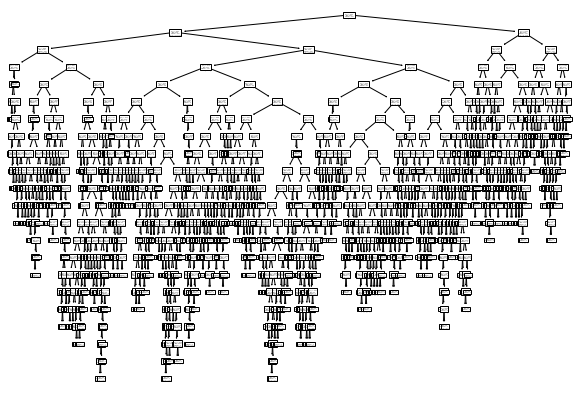

In [ ]:
# 그림으로 표현 plot_tree(), 깊이가 깊어 시간이 조금 걸림
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

### 트리 읽는 법
---

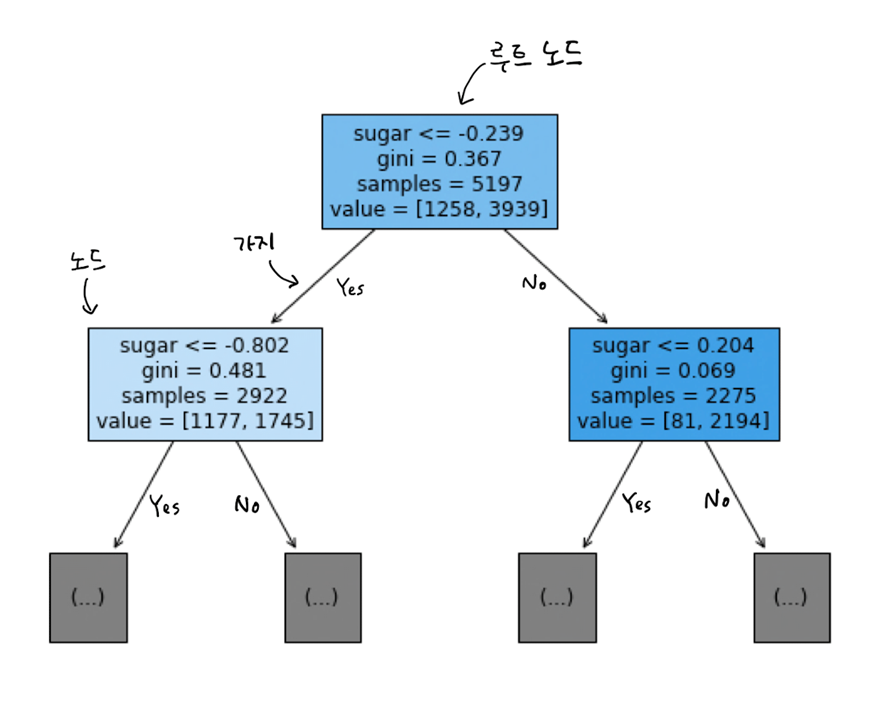

- 루트 노드 당도 sugar <= -0.239, samples 5197, value=[red,white] = [1258, 3339]
- 루트 노드 조건을 만족하면 왼쪽, 아니면 오른쪽
- filled=True 클래스 비율이 높으면 점점 진한색으로 표시 
- mxmax_depth 로 깊이 조절
- 예측하는 방법은 리프 가지 노드에서 클래스가 많은 쪽을 예측
- 현재 깊이에서는 모두 양성 Red Wine 예측 됨

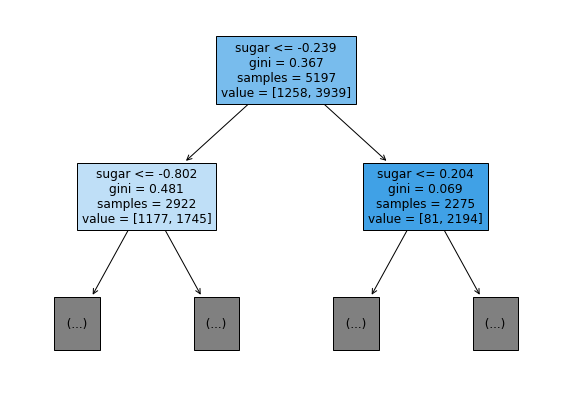

In [ ]:
# 깊이를 제한해서 출럭
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 지니 불순도 Gini impurity 
---
- DecisionTreeClassifier 클래스의 criterion 매개 변수 값
- 노드에서 데이터를 분할할 기준을 정하는 것

> **$지니 불순도 = 1 - (음성클래스비율^2 + 양성클래스비율^2)$**

> **$1 - ((1258/5197)^2 + (3939/5197)^2) = 0.367$**

> 만약 100개의 샘플이 어떤 노드에서 클래스 비율이 1/2 50개씩 이라면
>  1 - ((50/100)^2 + (50/100)^2) = 0.5 불순도 가장 커짐

> 만약 100개의 샘플이 어떤 노드에 하나의 클래스만 있다면
>  1 - ((0/100)^2 + (100/100)^2) = 0 불순도 가장 작음, 순수 노드라고 함

### 정보 이득 information gain
---
- 부모와 자식 노드 사이의 불순도 차이
- 결정 트리에서 불순도 계산은 부모 노드 parent node와 자식 노드 child node의 불순도 차이가 가능한 크도록 트리를 생성
- 불순도를 기준으로 사용해서 정보 이득이 최대가 되도록 노드를 분할
- 먼저 자식 노드의 불순도를 샘플의 개수에 비례하여 모두 더함
- 다음 부모 노드의 불순도를 뺌

> **부모 불순도 - (왼쪽 노드 샘플수 / 부모 노드 샘플수) x 왼쪽 노드 불순도 - (오른쪽 노드 샘플수 / 부모 노드 샘플수) x 오른쪽 노드 불순도**

> **0.367 - (2922 / 5197) x 0.481 - (2275 / 5197) x 0.069 = 0.066**


### 엔트로피 불순도 entropy
---
- criterion='entropy'
- 밑이 2인 로그를 사용해서 계산
- 기본값은 지니 불순도, 모델의 결과 차이는 많이 안남

> **$ -음성 클래스 비율 * log_2(음성클래스 비율) -양성 클래스 비율 * log_2(양성클래스 비율)$**

> **$ -(1258 / 5197) * log_2(1258 / 5197) -(3939 / 5197) * log_2(3939 / 5197) = 0.798$**



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt2 = DecisionTreeClassifier(random_state=42, criterion='entropy')
dt2.fit(train_scaled, train_target)

# 과대 적합
print(dt2.score(train_scaled, train_target))
print(dt2.score(test_scaled, test_target))

0.996921300750433
0.8492307692307692


### 가지치기 Pruning
---
- 과대 적합을 막으려면 트리의  깊이를 조절 해야 함

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

# 과대 적합은 없어 졌으나 성능이 낮아 짐
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


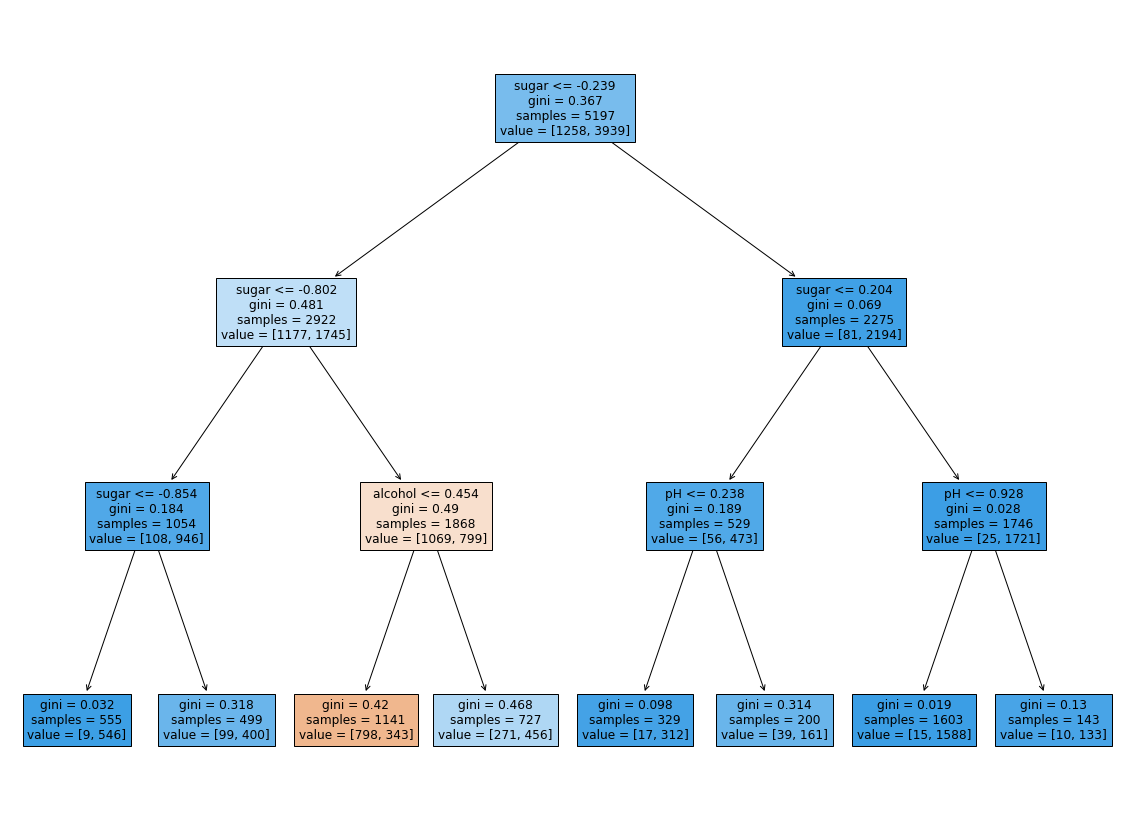

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 결정트리는 표준화 전처리 불필요
---

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


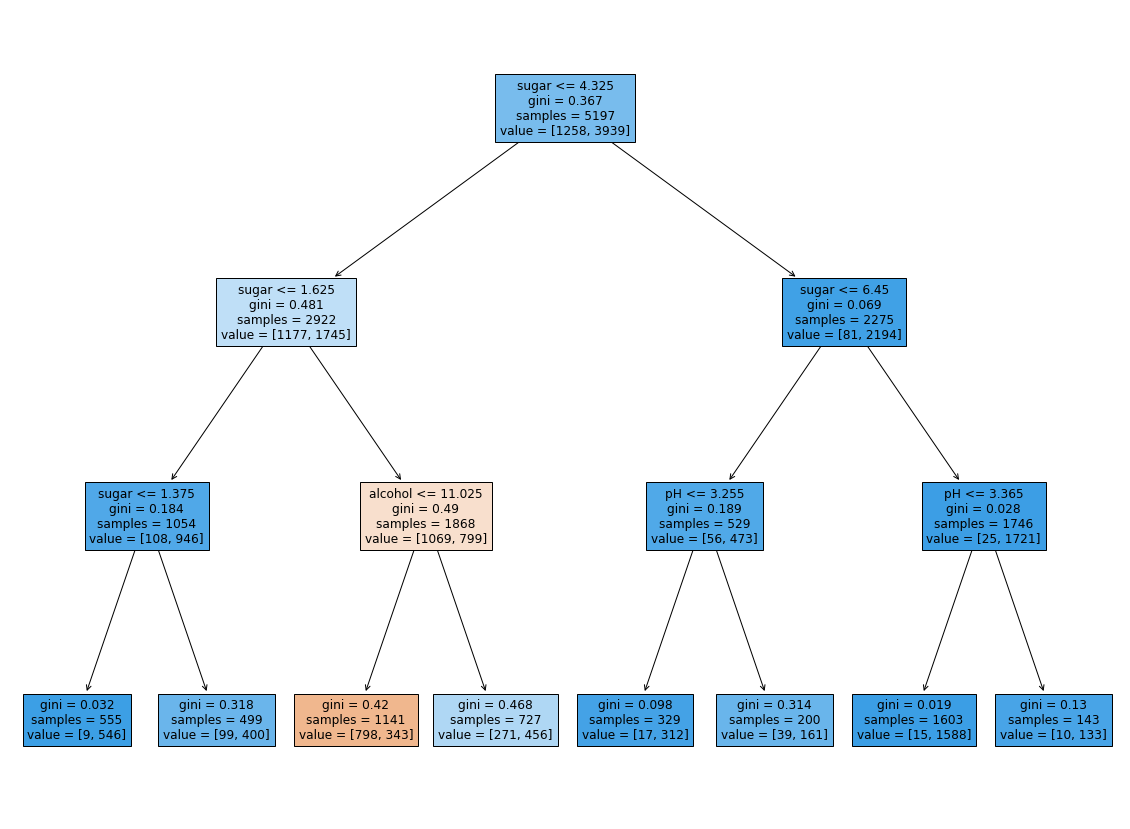

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 특성 중요도 feature_importances_ 속성값 사용
---
- 어떤 특성이 가장 유용한지 특성 중요도를 계산 해줌
- 특성 중요도를 특성 선택에 활용 가능
- sugar 당도가 가장 높음, 중요함 

In [ ]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


## 좌우 대칭 아닌 트리 만들기 min_impurity_decrease 매개변수
---
- 정보 이득 * (노드 샘플수 / 전체 샘플수) 값이 min_impurity_decrease 매개변수 값보다 작으면 더 이상 불할 하지 않음

In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


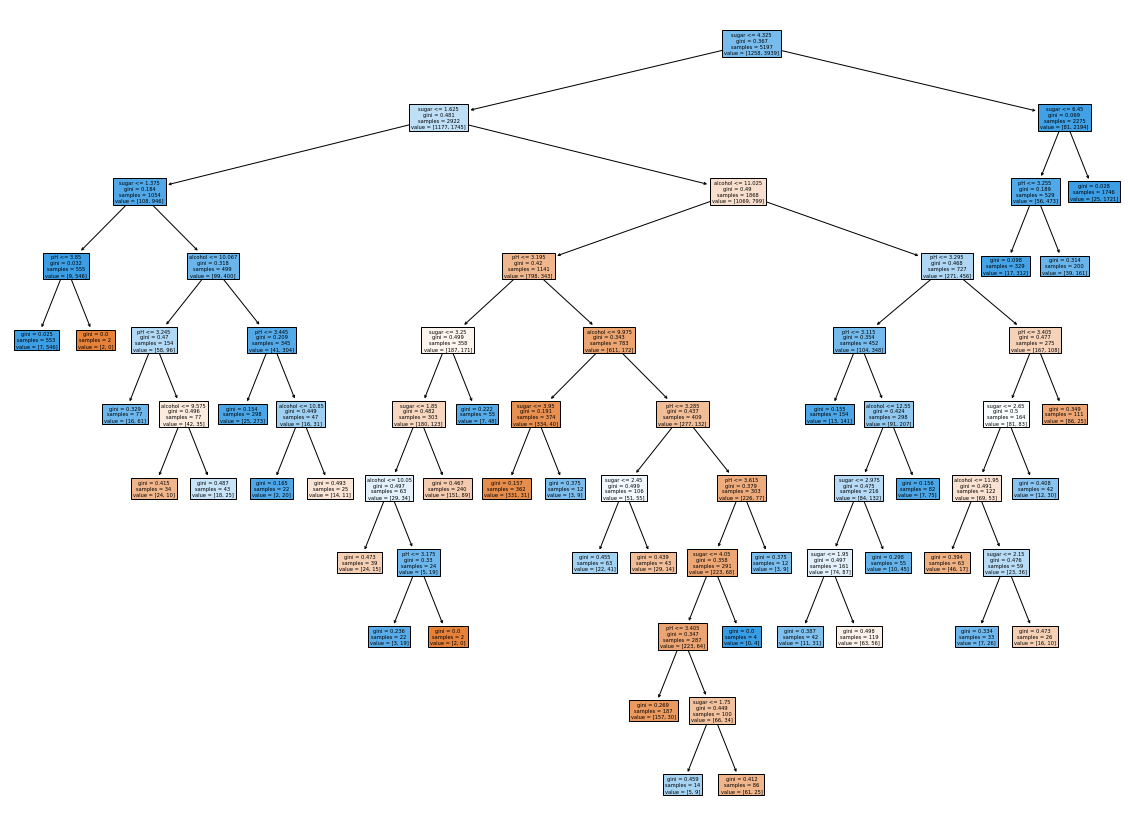

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()